In [2455]:
import json as json
import pathlib as pl
from datetime import datetime
from os import path

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from numpy import array

gain = 3.
rcParams[ 'figure.figsize' ] = [ gain * 6.4, gain * 4.8 / 2 ]

In [2456]:
for v in pl.Path( "./plots" ).glob( '*' ):
	if datetime.fromtimestamp( path.getctime( v ) ).date() >= datetime.today().date():
		print( v )

plots\three_robots_chain_1725981792
plots\three_robots_chain_1725982395
plots\three_robots_chain_1725983462
plots\three_robots_chain_1725984151
plots\three_robots_chain_1725984674
plots\three_robots_chain_1725985581
plots\three_robots_chain_1725985667
plots\three_robots_chain_1725985778
plots\three_robots_chain_1725987609
plots\three_robots_chain_1725987889
plots\three_robots_chain_1725988336
plots\three_robots_chain_1725990018
plots\three_robots_chain_1725990436
plots\three_robots_chain_1725992307
plots\three_robots_chain_1725995232
plots\three_robots_chain_1725997640
plots\three_robots_chain_1726000017
plots\three_robots_chain_1726000711
plots\three_robots_chain_1726001196
plots\three_robots_chain_1726001254


In [2457]:
folder = pl.Path( './plots/three_robots_chain_1726000711' )
data = pd.read_csv( f'{folder}/logs.txt', sep = '\t' )
with open( f'{folder}/config.json' ) as f:
	conf = json.load( f )

In [2458]:
def disp( d: dict, prefix: str = '' ):
	for k, v in d.items():

		if isinstance( v, dict ):
			print( prefix + k + ':' )
			disp( v, prefix + '\t' )
			continue

		if isinstance( v, list ):
			if len( v ) > 0 and isinstance( v[ 0 ], dict ):
				print( prefix + k + ':' )
				disp( { str( i ): e for i, e in enumerate( v ) }, prefix + '\t' )
				continue

			l = array( v ).shape
			print( prefix + k + ':', v if sum( l ) < 10 else l )
			continue

		print( prefix + k + ':', v )


disp( conf )

model_dynamics: three_robots_chain
time_step: 0.01
kwargs:
	weight: [0.0, 0.0, 112.81500000000001]
	buoyancy: [0.0, 0.0, -120.0]
	center_of_mass: [0.0, 0.0, 0.0]
	center_of_volume: [0.0, 0.0, -0.02]
	inverted_inertial_matrix: (6, 6)
	hydrodynamic_matrix: (6, 6)
state: (36,)
actuation: (18,)
record: True
previous_states: (1, 36)
previous_actuations: (1, 18)
model: None
horizon: 25
target_trajectory: (4000, 1, 18)
objective: None
time_steps_per_actuation: 25
guess_from_last_solution: True
tolerance: 1e-06
max_iter: 1000
bounds: None
constraints:
	0:
		fun: constraint_f
		lb: (225,)
		ub: (225,)
		finite_diff_rel_step: None
		finite_diff_jac_sparsity: None
		jac: 2-point
		hess: None
		keep_feasible: False
result_shape: [1, 1, 18]
raw_result: None
result: (1, 1, 18)
pose_weight_matrix: (25, 18, 18)
actuation_derivative_weight_matrix: (1, 18, 18)
objective_weight: 0.0
final_weight: 10.0
predicted_trajectories: []
candidate_actuations: []
times: []
verbose: False


In [2459]:
conf['constraints'][0]['ub'][:225//25]

[3.0, 3.0, 2.8, 2.8, 2.8, 2.8, 3.0, 3.0, 3.0]

In [2460]:
data.tail( 10 )

,index,sim_time,step_time,success,C01,C12,D01,D12,H01,H12,state_r0,state_r1,state_r2,speed_r0,speed_r1,speed_r2,actuation_r0,actuation_r1,actuation_r2,Unnamed: 19
1006,1006,2524.267249,3.161977,True,0.522523,1.012442,1.710309,0.184424,0.816468,0.017268,"[-2.9992276268255638, 2.2593021329562545e-05, 0.000840293930323134, 8.29884100840943e-05, 0.00022605000066851534, 2.9337020930933213e-05]","[-0.28374305028695007, 0.059145165978249314, 0.5468569366614849, -6.365944800886196e-05, -1.8848273222219567e-06, 0.00012150310853761793]","[1.6236161105505487, -0.25112434350796276, -1.4309480293814862, 2.1764275288238918e-05, -0.00013983628066882597, 0.00010024795702887714]","[0.020407723119309464, 0.0007716479614248828, 0.0024632102313869014, 0.0001463176919938467, -0.0006027854785102063, -0.0007190563826501027]","[-0.12180322454984509, 0.599853815168934, 0.2743630483516914, -5.4132741618792435e-05, -0.00031016135300053986, 0.00034241571456277163]","[-0.22360992315342657, 0.5145126078684086, 0.2722215842383939, -0.0002739603581917308, -0.00017896762300272724, 0.0002374404678337689]","[3.1762797155797933, -0.11802002745075102, 7.420821037139978, -0.0003719658282782618, -0.0008557025461025891, 2.8133913435075127e-05]","[-24.304830816647215, -50.10740065550812, 124.94002469055286, 0.000374868049051162, 5.131691848249951e-05, -0.0008828302375965504]","[-32.695825762079664, -60.15494935225542, 118.17734164094708, -0.00014656267716800603, 0.0005573269827091902, -0.0005965663311830401]",NaN
1007,1007,2526.630863,2.339139,True,0.523805,1.014372,1.710848,0.185438,0.819285,0.017492,"[-2.999009528218253, 2.9820011009022184e-05, 0.0008660043345761755, 8.427335012106796e-05, 0.0002195853132387773, 2.214916184310874e-05]","[-0.28505619954012484, 0.06486232569491732, 0.5500744520576799, -6.403651931894984e-05, -4.971824433668458e-06, 0.00012465407564960597]","[1.6212647348796674, -0.24629496249498364, -1.4277850668982426, 1.8963967372654042e-05, -0.00014135017286818954, 0.0001024378830304389]","[0.023212520155151142, 0.0006729712048365437, 0.0026886383078450027, 0.00011093282321401863, -0.0006901743765980271, -0.0007184067341380056]","[-0.14069465008022203, 0.5435185694995571, 0.3692852369918244, -2.124598754746855e-05, -0.0003071989934861319, 0.0002876983714435198]","[-0.24649168906494046, 0.45136719990019647, 0.3604835892809375, -0.0002859783979208555, -0.0001237237624723149, 0.00020052400402463245]","[3.1360236203937095, -0.11737021681723345, 7.430899234897063, -0.0003743788367907806, -0.0008180282221062448, 6.070560186095929e-05]","[-21.196203732068042, -68.3420375178907, 114.67865242962634, 0.0003755265649874587, 6.077424096182929e-05, -0.0008975328793713776]","[-25.36579248922181, -75.62113599936494, 107.04777094407767, -0.00012379072210239628, 0.0005569644806721743, -0.0006059931196142705]",NaN
1008,1008,2528.521576,1.872346,True,0.525184,1.016247,1.711803,0.186362,0.822706,0.017700,"[-2.9987635013575282, 3.606015773128634e-05, 0.0008940119253418912, 8.520237533905823e-05, 0.0002122629462275742, 1.4979389340258437e-05]","[-0.28654363628685914, 0.06993868738735623, 0.5541921442842502, -6.408583556857263e-05, -8.022334957048066e-06, 0.000127254541903705]","[1.6187159873371801, -0.24216614263701855, -1.4237860126643351, 1.6050786744878274e-05, -0.00014230880549903906, 0.00010425494096034284]","[0.02599328103810506, 0.0005745341784864938, 0.002923575055798783, 7.513262999526636e-05, -0.000774298859961305, -0.000715421397940486]","[-0.1566687395496896, 0.47167370392835467, 0.4543841035144675, 1.1411129100987092e-05, -0.0003028570228319043, 0.0002323153938446816]","[-0.263068665759564, 0.3743940562433452, 0.43944433721009685, -0.0002965410534750972, -6.793174647082134e-05, 0.0001628635024477238]","[3.0971766648117818, -0.11647354520310305, 7.440641890910067, -0.00037587466302096035, -0.0007763447766628094, 9.794943997247053e-05]","[-17.77098775856031, -85.77950527242643, 102.91555836091338, 0.00036904683162820455, 7.522460319898438e-05, -0.00090432953

In [2461]:
state_r0 = data[ 'state_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
state_r1 = data[ 'state_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
state_r2 = data[ 'state_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r0 = data[ 'speed_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r1 = data[ 'speed_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r2 = data[ 'speed_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
actuation_r0 = data[ 'actuation_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
actuation_r1 = data[ 'actuation_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
actuation_r2 = data[ 'actuation_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)

n_frames = len( conf[ 'target_trajectory' ] )
traj = array( conf[ 'target_trajectory' ] )[ :n_frames // 2, :, : ]

Text(0, 0.5, 'squared error [m]')

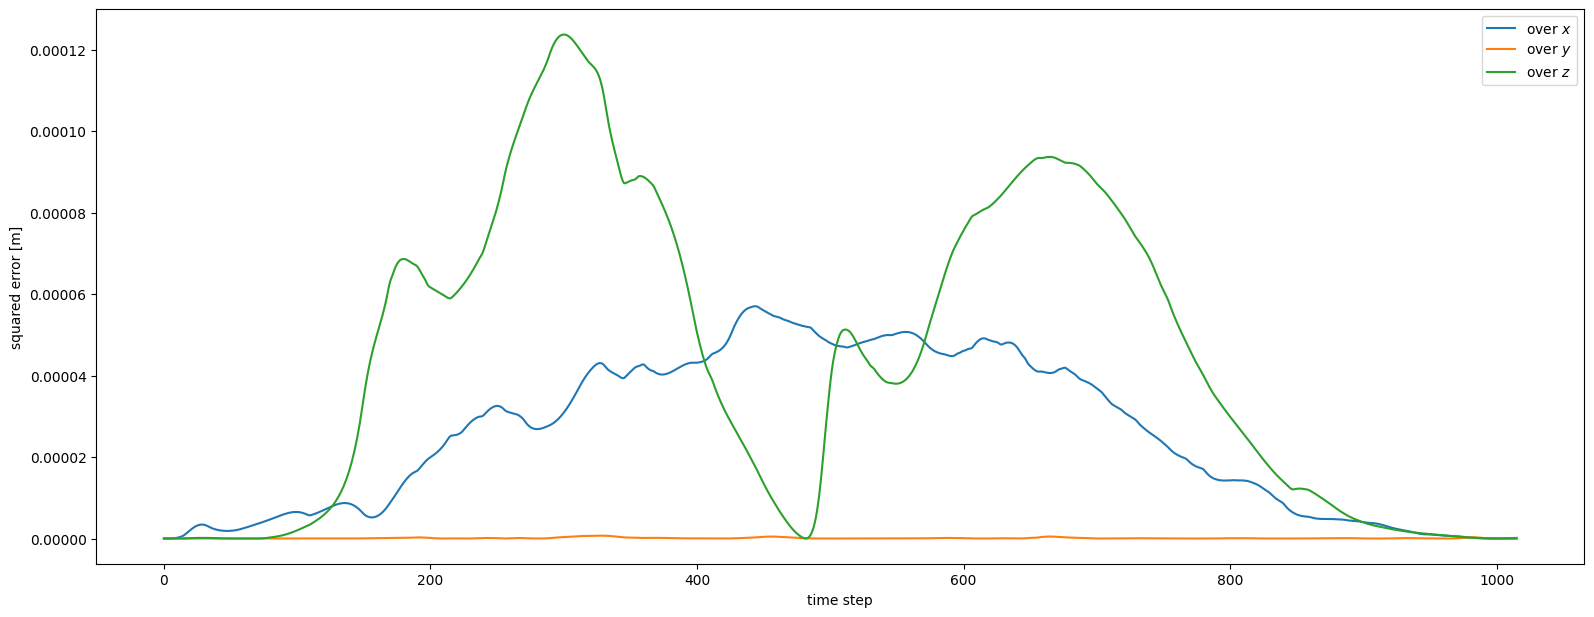

In [2462]:
plt.plot( abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] ) ** 2 )
plt.legend( [ 'over $x$', 'over $y$', 'over $z$' ] )
plt.xlabel( 'time step' )
plt.ylabel( 'squared error [m]' )

Text(0, 0.5, '$x$-axis [m]')

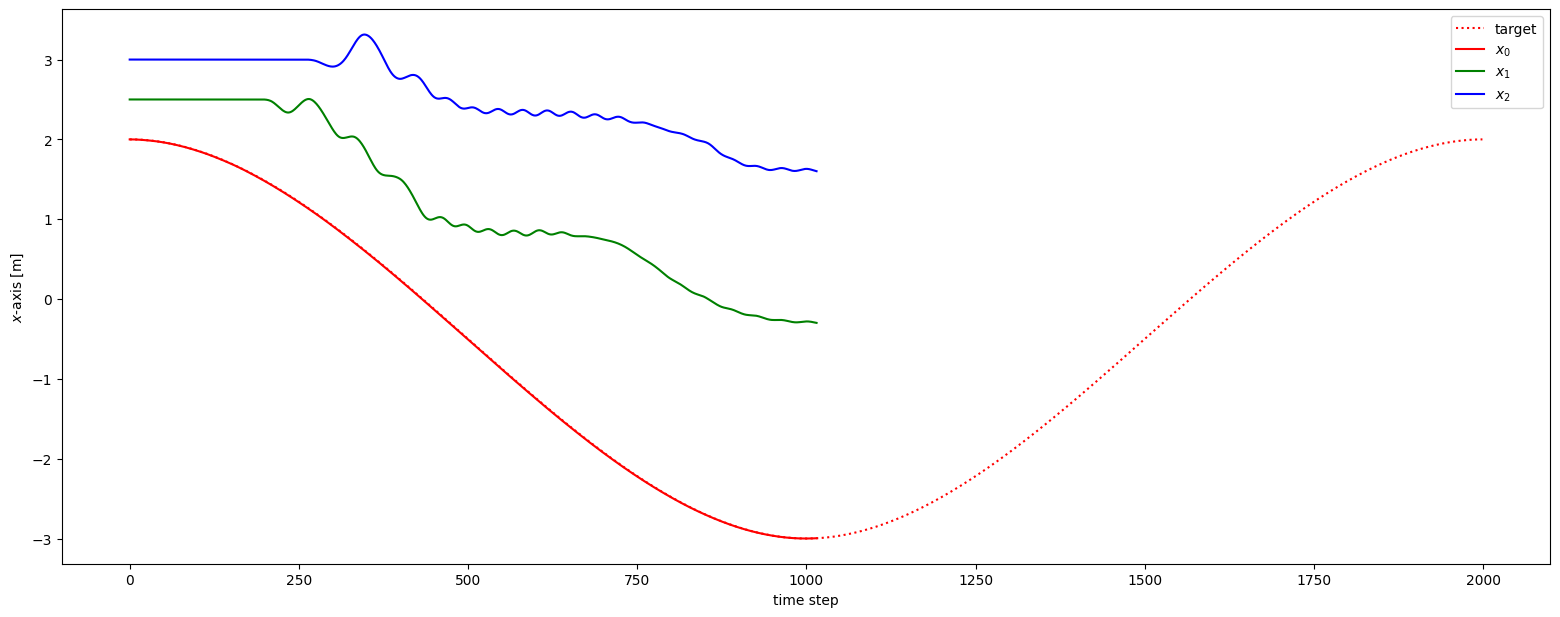

In [2463]:
plt.plot( traj[ :, 0, 0 ], ':', color = 'r' )
plt.plot( state_r0[ 'x' ], 'r' )
plt.plot( state_r1[ 'x' ], 'g' )
plt.plot( state_r2[ 'x' ], 'b' )

plt.legend( [ 'target', '$x_0$', '$x_1$', '$x_2$' ] )
plt.xlabel( 'time step' )
plt.ylabel( '$x$-axis [m]' )

Text(0, 0.5, '$y$-axis [m]')

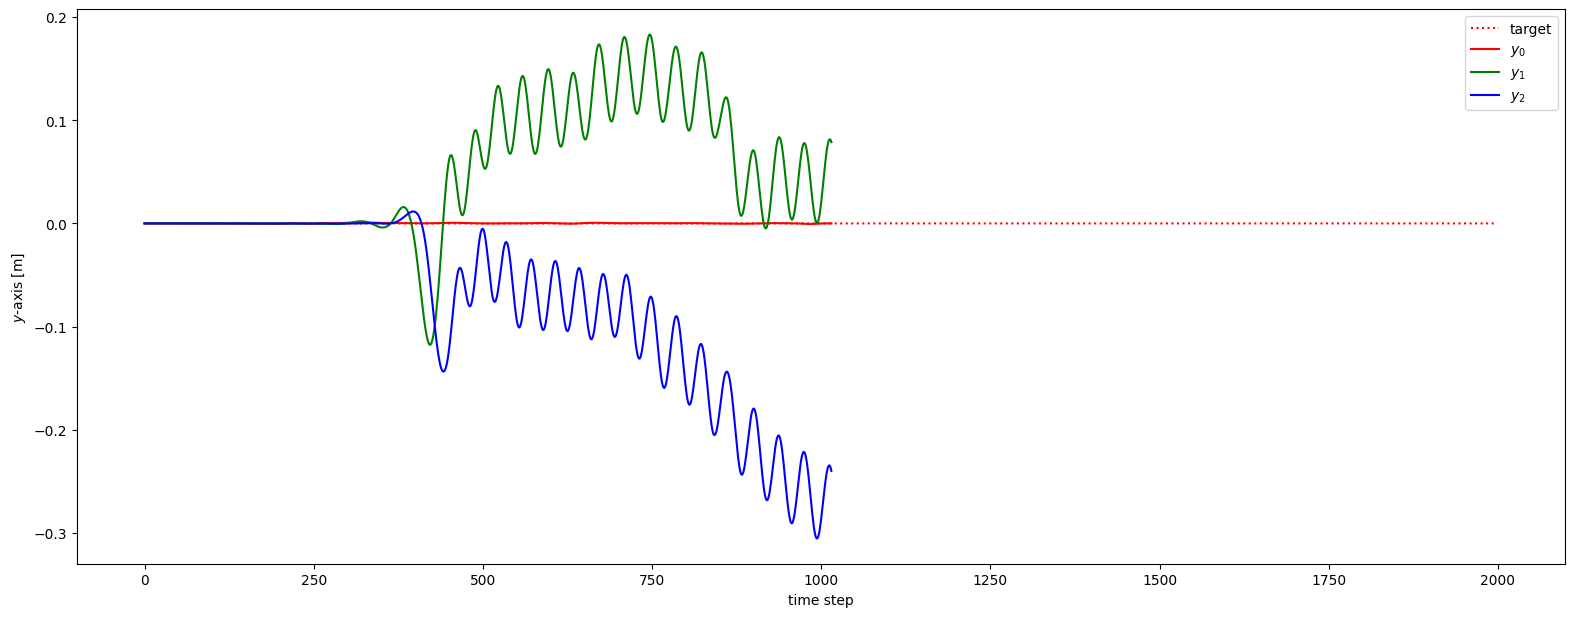

In [2464]:
plt.plot( traj[ :, 0, 1 ], ':', color = 'r' )
plt.plot( state_r0[ 'y' ], 'r' )
plt.plot( state_r1[ 'y' ], 'g' )
plt.plot( state_r2[ 'y' ], 'b' )

plt.legend( [ 'target', '$y_0$', '$y_1$', '$y_2$' ] )
plt.xlabel( 'time step' )
plt.ylabel( '$y$-axis [m]' )

Text(0, 0.5, '$z$-axis [m]')

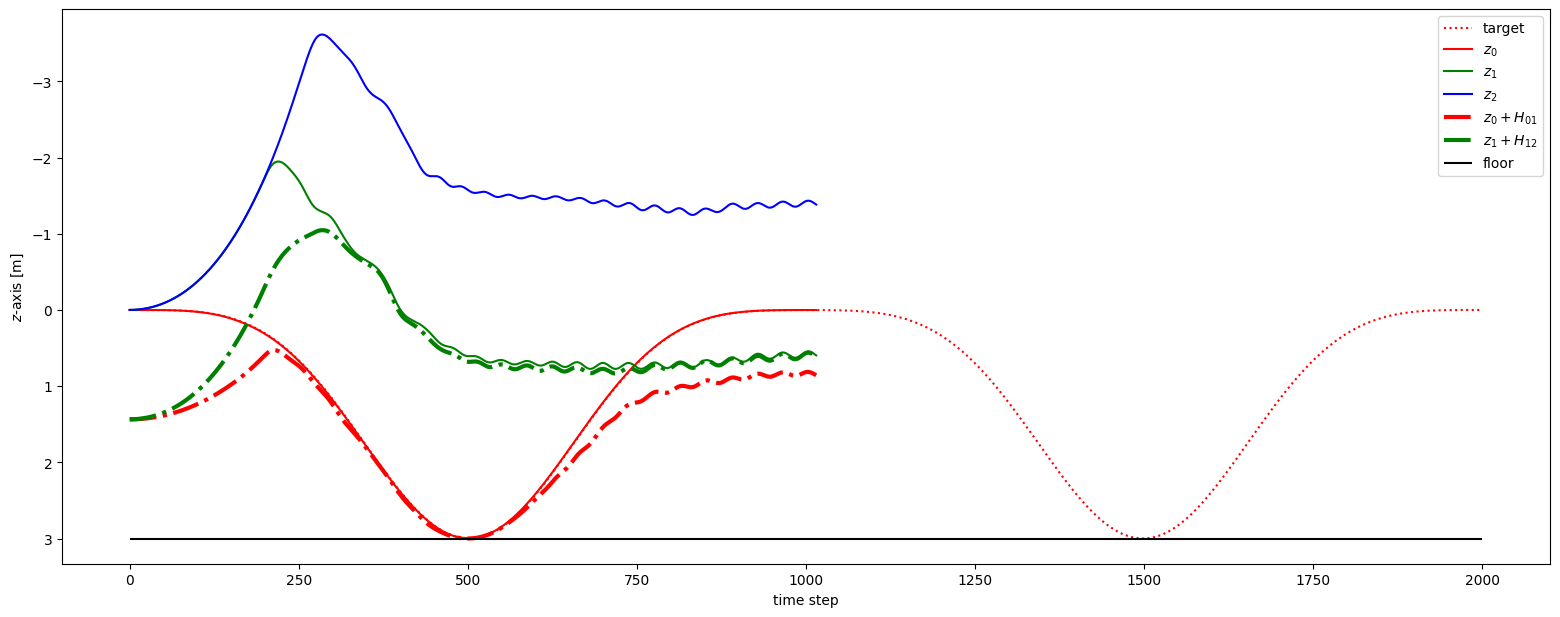

In [2465]:
plt.plot( traj[ :, 0, 2 ], ':', color = 'r' )
plt.plot( state_r0[ 'z' ], 'r' )
plt.plot( state_r1[ 'z' ], 'g' )
plt.plot( state_r2[ 'z' ], 'b' )
plt.plot( data[ 'H01' ] + state_r0[ 'z' ], '-.', color = 'r', linewidth = 3 )
plt.plot( data[ 'H12' ] + state_r1[ 'z' ], '-.', color = 'g', linewidth = 3 )

plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 0 ], 0, n_frames // 2, 'k' )
plt.legend( [ 'target', '$z_0$', '$z_1$', '$z_2$', '$z_0 + H_{01}$', '$z_1 + H_{12}$', 'floor' ] )
plt.gca().invert_yaxis()
plt.xlabel( 'time step' )
plt.ylabel( '$z$-axis [m]' )

<Axes: >

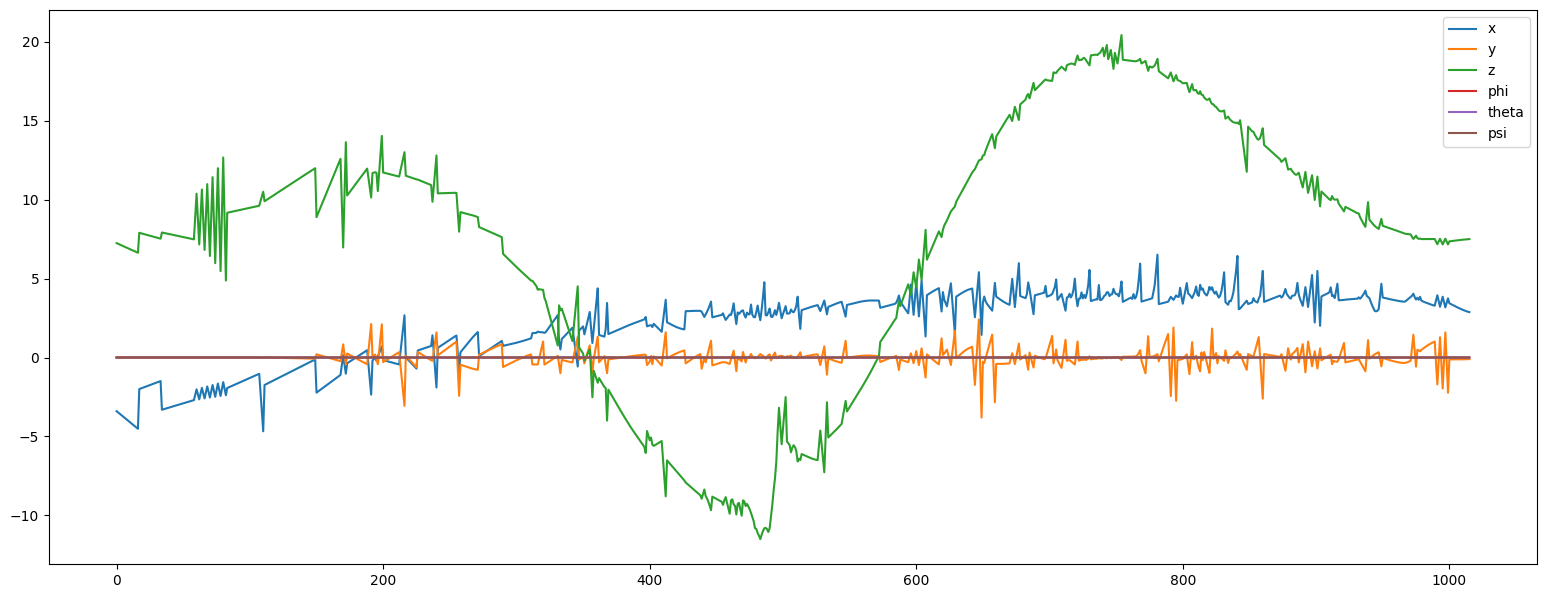

In [2466]:
actuation_r0.plot()

<Axes: >

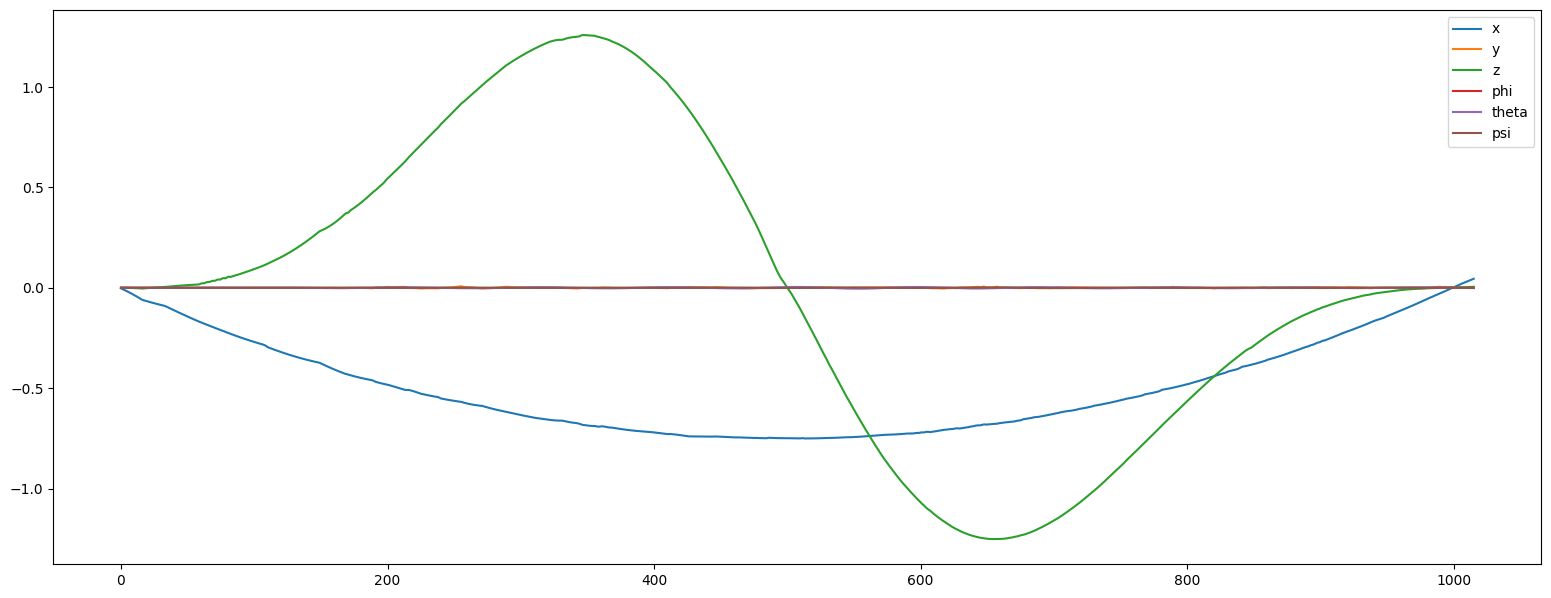

In [2467]:
speed_r0.plot()

<Axes: >

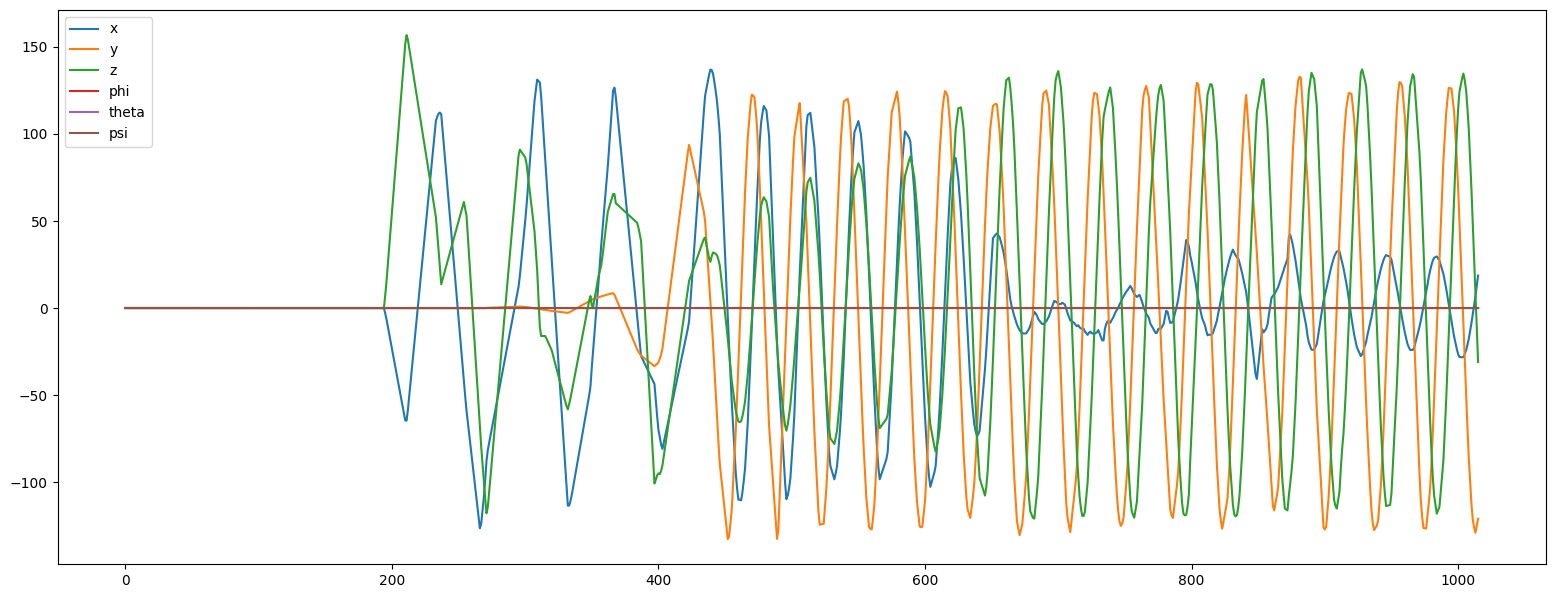

In [2468]:
actuation_r1.plot()

<Axes: >

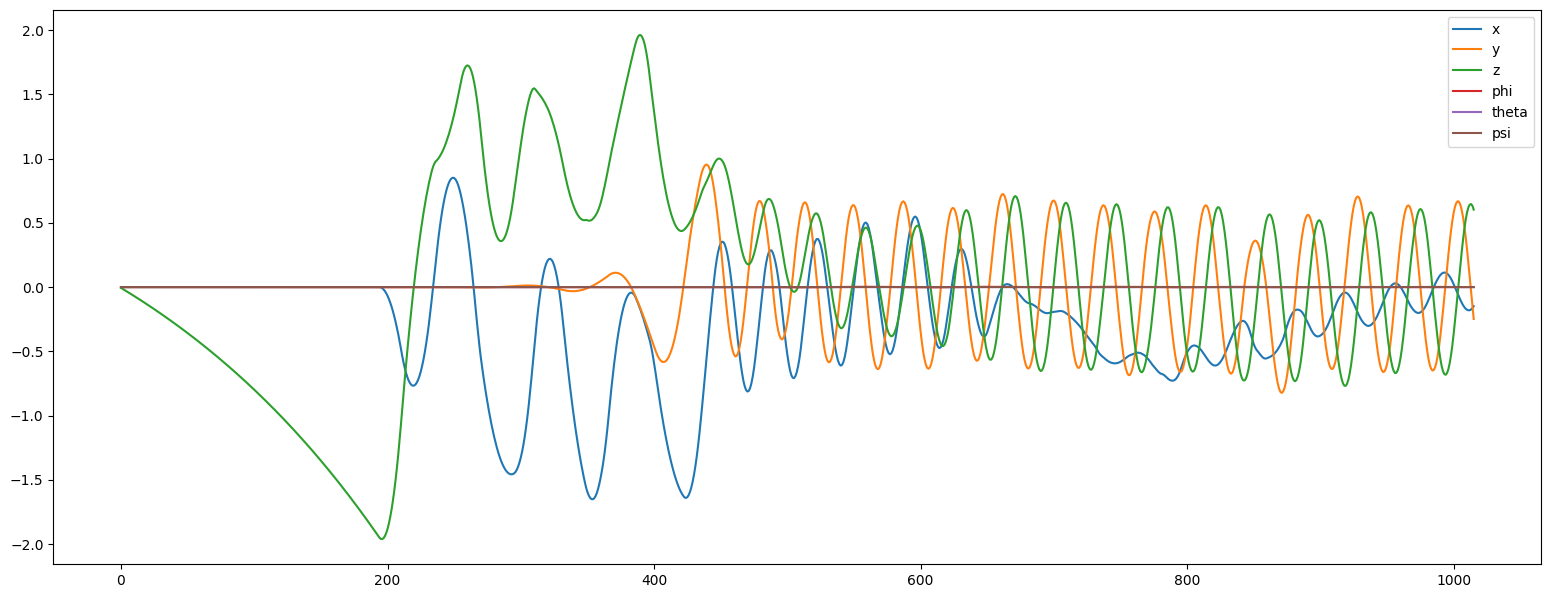

In [2469]:
speed_r1.plot()

<Axes: >

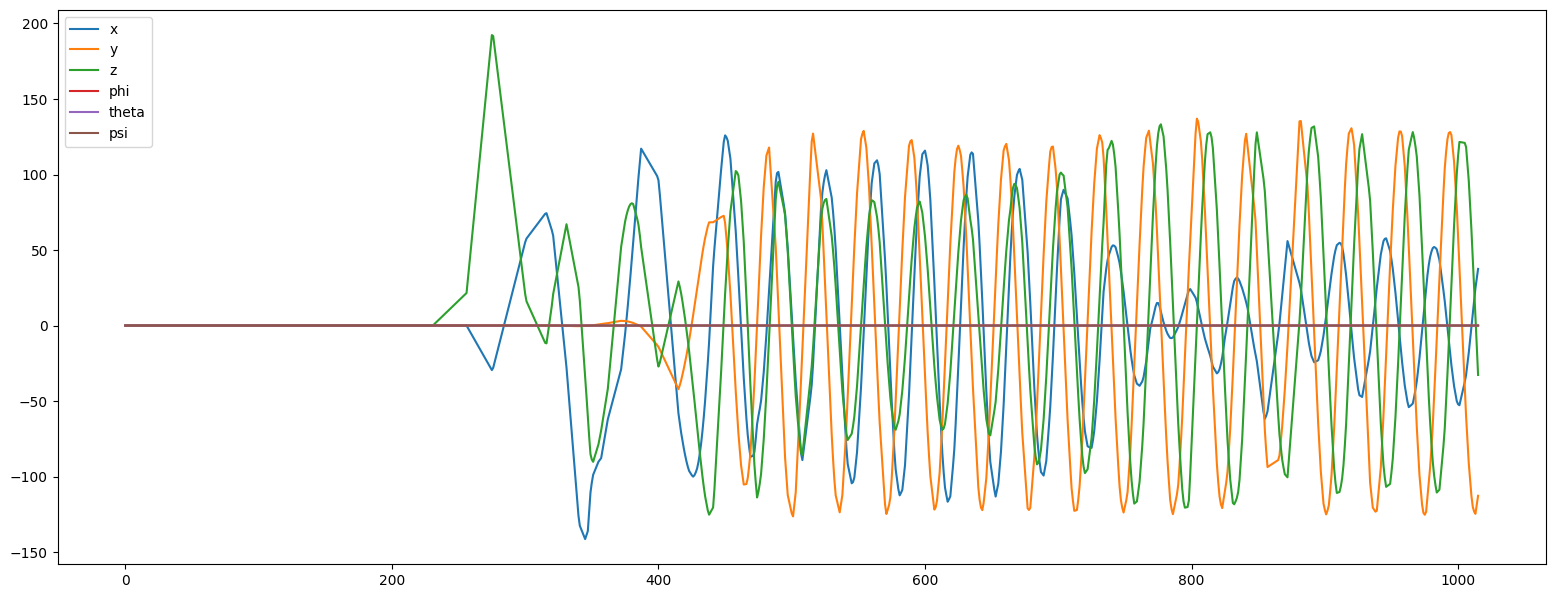

In [2470]:
actuation_r2.plot()

<Axes: >

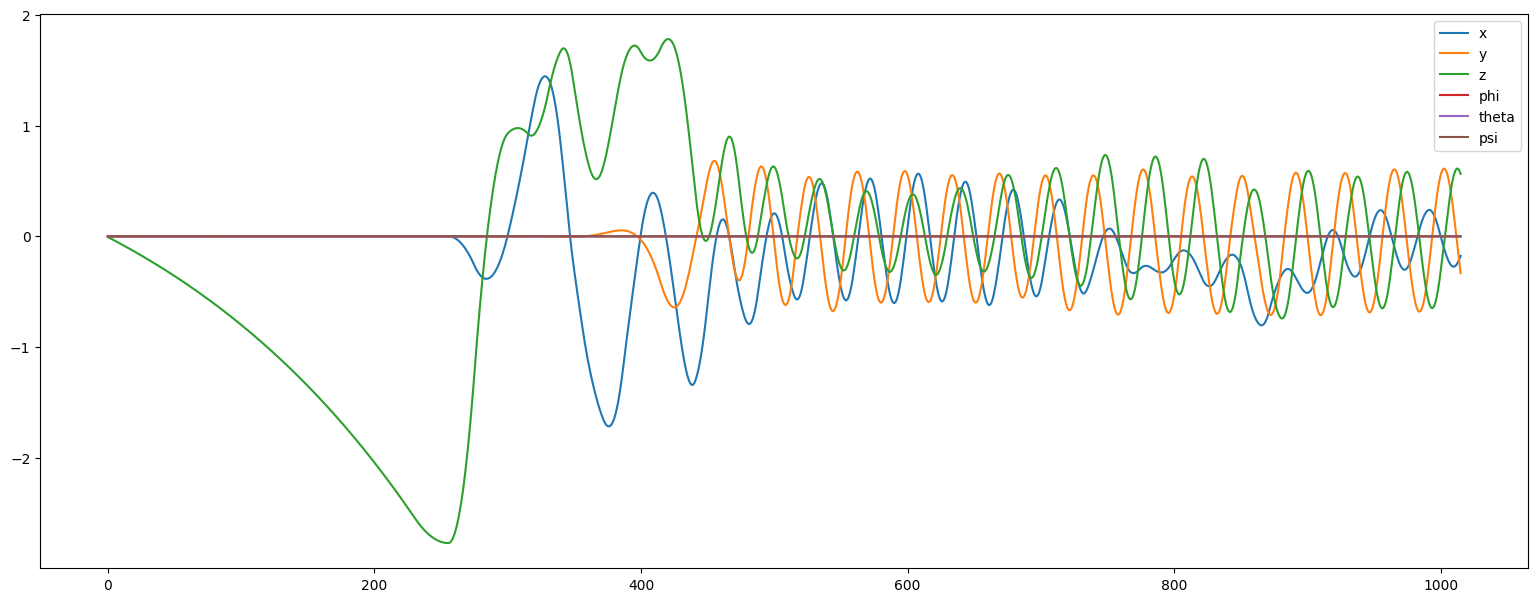

In [2471]:
speed_r2.plot()

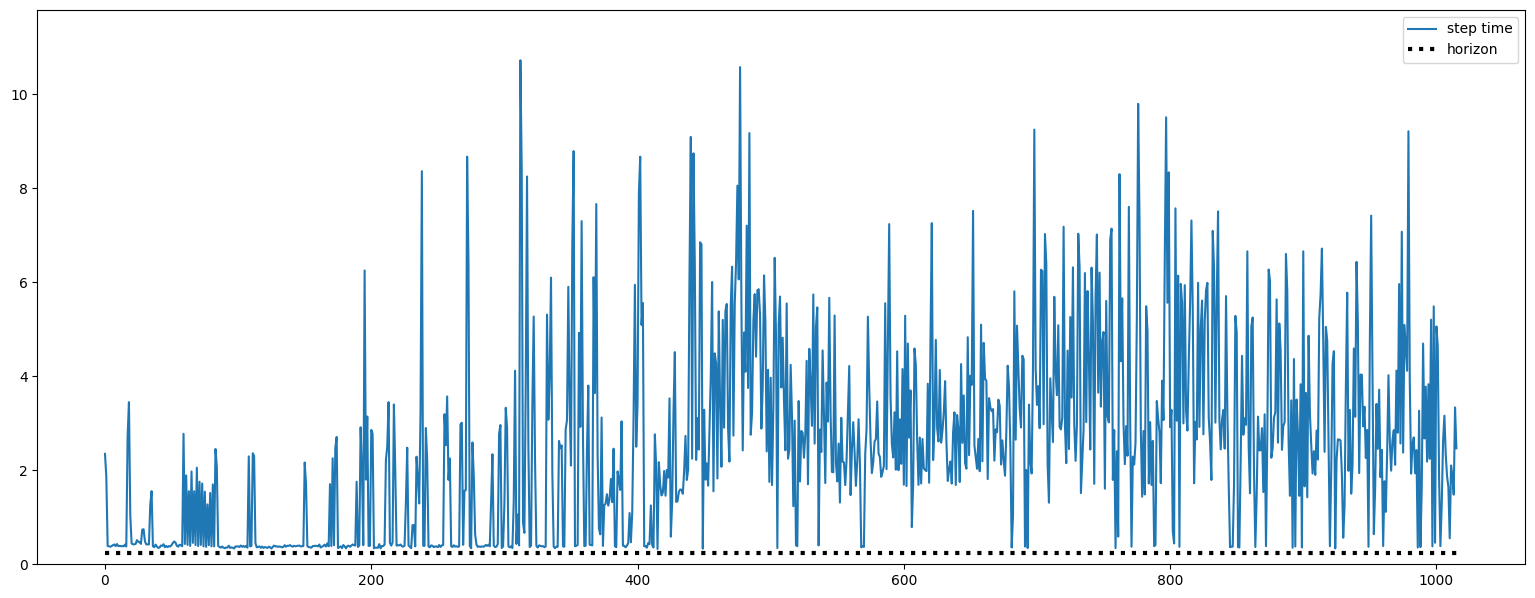

In [2472]:
data[ 'step_time' ].plot()
plt.gca().set_ylim( 0, data.step_time.max() * 1.1 )
plt.hlines( conf[ 'time_step' ] * conf[ 'horizon' ], 0, data.shape[ 0 ], linestyles = ':', color = 'k', linewidth = 3 )
plt.legend( [ 'step time', 'horizon' ] )

In [2474]:
for v in pl.Path( "./plots" ).glob( '*' ):
	if datetime.fromtimestamp( path.getctime( v ) ).date() >= datetime.today().date():
		print( v, end = '\t' )
		print(datetime.fromtimestamp( path.getctime( v ) ), end = '\t')
		record = pd.read_csv( f'{v}/logs.txt', sep = '\t' ).shape[ 0 ]
		with open( f'{v}/config.json' ) as f:
			conf = json.load( f )
		planned = array( conf[ 'target_trajectory' ] ).shape[ 0 ] // 2
		print(f'{record=}\t{planned=}\t{record==planned}')

plots\three_robots_chain_1725981792	2024-09-10 17:23:12.607056	record=1000	planned=1000	True
plots\three_robots_chain_1725982395	2024-09-10 17:33:15.209467	record=1000	planned=1000	True
plots\three_robots_chain_1725983462	2024-09-10 17:51:02.265681	record=500	planned=500	True
plots\three_robots_chain_1725984151	2024-09-10 18:02:31.485258	record=200	planned=200	True
plots\three_robots_chain_1725984674	2024-09-10 18:11:14.770524	record=200	planned=200	True
plots\three_robots_chain_1725985581	2024-09-10 18:26:21.489613	record=500	planned=500	True
plots\three_robots_chain_1725985667	2024-09-10 18:27:47.794658	record=500	planned=500	True
plots\three_robots_chain_1725985778	2024-09-10 18:29:38.993805	record=500	planned=500	True
plots\three_robots_chain_1725987609	2024-09-10 19:00:09.313886	record=500	planned=500	True
plots\three_robots_chain_1725987889	2024-09-10 19:04:49.125741	record=1000	planned=1000	True
plots\three_robots_chain_1725988336	2024-09-10 19:12:16.504329	record=1000	planned=1